In [1]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [1]:
def features (df):
    columns_to_drop=['EmployeeID','EmployeeCount','Gender','JobSatisfaction','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours']
    df.drop(columns=columns_to_drop, inplace=True)
    df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Frequently', 1, 0)
    df['Education']= np.where(df['Education'] == 5, 1, 0)
    df['EducationField'] = np.where((df['EducationField'] == "Life Sciences") | (df['EducationField'] == "Medical") | (df['EducationField'] == "Other"), 1, 0)
    df['EnvironmentSatisfaction'] = np.where(df['EnvironmentSatisfaction'] == 1, 1, 0)
    df['JobInvolvement'] = np.where((df['JobInvolvement'] == 1)|(df['JobInvolvement'] == 2), 1, 0)
    df['JobLevel'] = np.where(df['JobLevel'] == 1, 1, np.where(df['JobLevel'] == 2, 2, np.where(df['JobLevel'] == 4, 2, 0)))
    df['JobRole'] = np.where((df['JobRole'] == 'Nurse') | (df['JobRole']== "Other") , 1, 0)
    df['MaritalStatus']= np.where((df['MaritalStatus'] == 'Single'), 1, 0)
    df['Shift']= np.where((df['Shift'] == 0) | (df['Shift']== 3) , 1, 0)
    df['WorkLifeBalance']= np.where(df['WorkLifeBalance'] == 1, 1, 0)
    df['Attrition']= df['Attrition'].replace({'No':0,'Yes':1})
    df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
    return df


In [4]:
# import Features1 as fe
# import numpy as np
# fe.features(df)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,Cardiology,1,0,0,0,94,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,279,Maternity,8,0,0,0,61,...,1,0,0,10,3,0,10,7,1,7
2,37,1,0,1373,Maternity,2,0,0,0,92,...,6,1,1,7,3,0,0,0,0,0
3,33,0,1,1392,Maternity,3,0,0,0,56,...,1,1,1,8,3,0,8,7,3,0
4,27,0,0,591,Maternity,2,0,0,1,40,...,9,0,0,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,471,Neurology,24,0,0,0,66,...,1,1,1,1,3,1,1,0,0,0
1672,46,0,0,1125,Cardiology,10,0,0,0,94,...,2,1,0,15,3,0,3,2,1,2
1673,20,0,0,959,Maternity,1,0,0,0,83,...,1,0,1,1,0,0,1,0,0,0
1674,39,0,0,466,Neurology,1,0,0,0,65,...,1,0,0,21,3,0,21,6,11,8


In [83]:
# features (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,Cardiology,1,0,0,0,94,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,279,Maternity,8,0,0,0,61,...,1,0,0,10,3,0,10,7,1,7
2,37,1,0,1373,Maternity,2,0,0,0,92,...,6,1,1,7,3,0,0,0,0,0
3,33,0,1,1392,Maternity,3,0,0,0,56,...,1,1,1,8,3,0,8,7,3,0
4,27,0,0,591,Maternity,2,0,0,1,40,...,9,0,0,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,471,Neurology,24,0,0,0,66,...,1,1,1,1,3,1,1,0,0,0
1672,46,0,0,1125,Cardiology,10,0,0,0,94,...,2,1,0,15,3,0,3,2,1,2
1673,20,0,0,959,Maternity,1,0,0,0,83,...,1,0,1,1,0,0,1,0,0,0
1674,39,0,0,466,Neurology,1,0,0,0,65,...,1,0,0,21,3,0,21,6,11,8


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
!pip install imbalanced-learn

In [19]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']

In [20]:



# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), ['Department', 'JobLevel']),
    ],
    remainder='passthrough'
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)
# other_X= df[['BusinessTravel','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','JobRole','MaritalStatus','Shift','OverTime','WorkLifeBalance']]
# X_scaled= pd.concat([transformed_X, other_X], axis=1)

# X_scaled.head()
transformed_X.head()


,num__Age,num__DailyRate,num__DistanceFromHome,num__HourlyRate,num__MonthlyIncome,num__MonthlyRate,num__NumCompaniesWorked,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,...,remainder__BusinessTravel,remainder__Education,remainder__EducationField,remainder__EnvironmentSatisfaction,remainder__JobInvolvement,remainder__JobRole,remainder__MaritalStatus,remainder__OverTime,remainder__Shift,remainder__WorkLifeBalance
0,0.452933,0.750837,-1.008126,1.412260,-0.110748,0.727502,2.154939,-0.426280,-2.178097,-0.169491,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.329511,-1.299105,-0.149829,-0.221278,-0.293315,1.488074,-0.671100,-0.170938,0.151012,0.486551,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.014644,1.425849,-0.885512,1.313258,-0.936423,-1.666173,1.347499,-0.553950,0.151012,-1.153553,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,-0.423644,1.473174,-0.762898,-0.468784,-0.763164,1.243144,-0.671100,-0.426280,0.151012,0.158530,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-1.081078,-0.521970,-0.885512,-1.260803,-0.644909,0.328579,2.558659,-0.681621,0.151012,-0.825533,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
from imblearn.over_sampling import SMOTE

# Assuming you have separate X (features) and y (target) variables
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(transformed_X, y)



In [22]:
X_resampled.shape

(2954, 29)

In [23]:
y_resampled.value_counts()

Attrition
0    1477
1    1477
Name: count, dtype: int64

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Modeling
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9919593736775285
Testing Accuracy: 0.9509306260575296


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [3, 5, 7, None],  # Define the values to be searched for max_depth
    'n_estimators': [50, 100, 200, 500]  # Define the values to be searched for n_estimators
}

# Create the random forest classifier
model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'max_depth': None, 'n_estimators': 500}
Best Score:  0.9661517557033541
Training Accuracy: 0.9970376639864579
Testing Accuracy: 0.9729272419627749


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       296
           1       0.98      0.97      0.97       295

    accuracy                           0.97       591
   macro avg       0.97      0.97      0.97       591
weighted avg       0.97      0.97      0.97       591



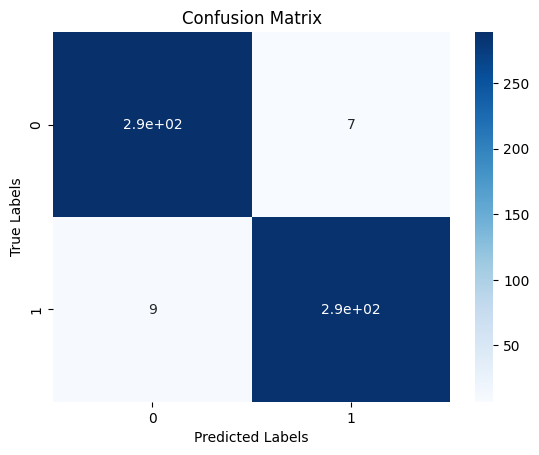

In [26]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

[0.04751558 0.02410329 0.03858146 0.02549266 0.04358426 0.0251842
 0.0234357  0.04567675 0.02384167 0.051419   0.02902575 0.01660153
 0.03050634 0.0256869  0.01120899 0.00946833 0.00702108 0.05920547
 0.02959242 0.0146506  0.00102254 0.         0.02867957 0.03774504
 0.01488377 0.05646563 0.20695077 0.05993959 0.01251111]


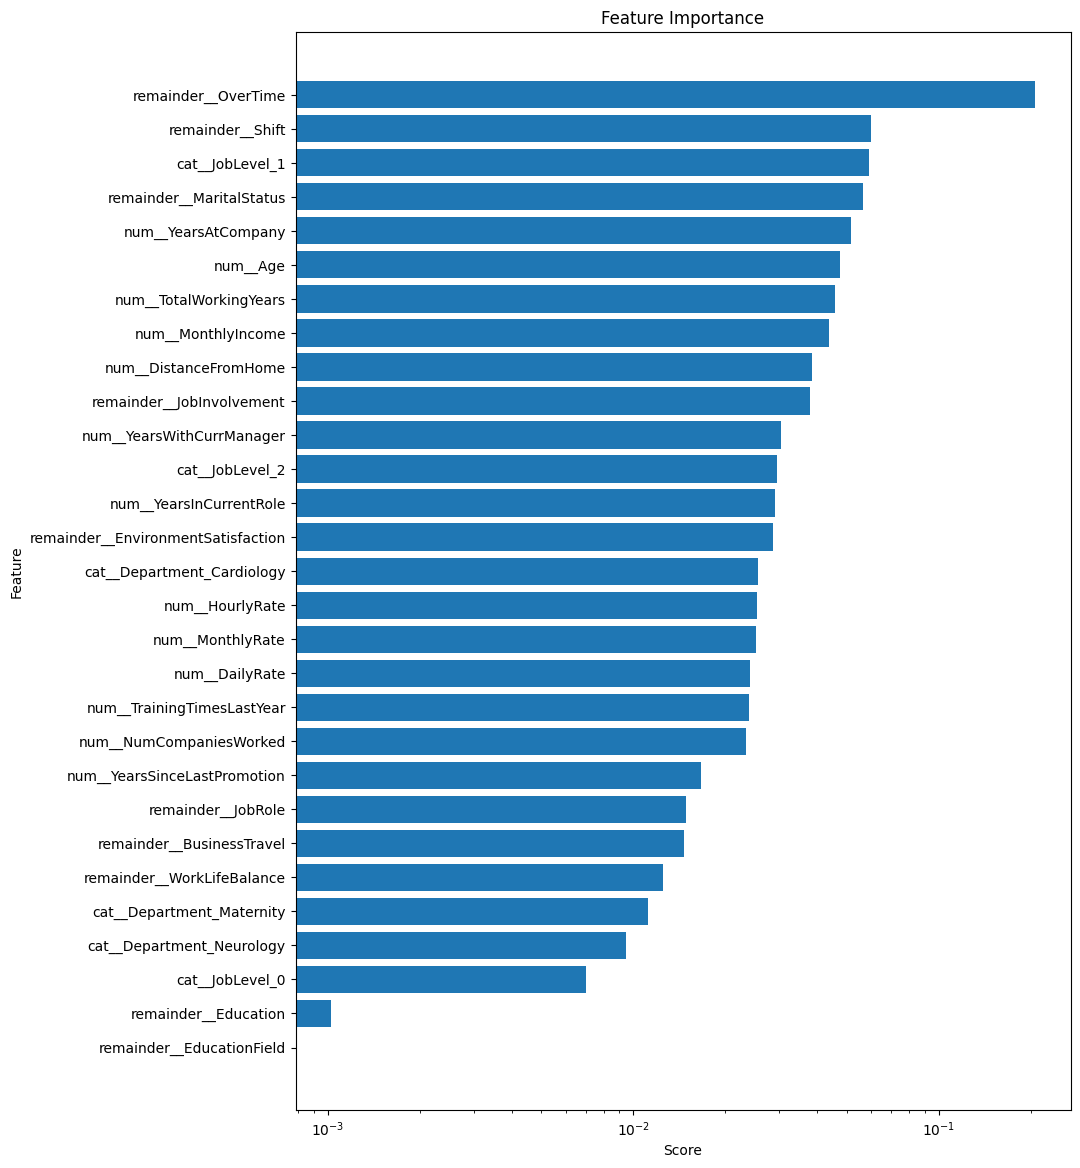

In [27]:
#feature importance score and plot them
feature_importance = best_model.feature_importances_
print(feature_importance)

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 14))

# Sort the feature importance scores and corresponding feature names
sorted_indices = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_indices]
sorted_scores = feature_importance[sorted_indices]

plt.barh(sorted_features, sorted_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Change the x-axis scale to logarithmic
plt.xscale('log')
plt.show()

In [21]:
# without sampling

In [28]:
# Split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

# Modeling
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train1, y_train1)

# Calculate the training accuracy
train_accuracy = model.score(X_train1, y_train1)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test1, y_test1)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9917910447761195
Testing Accuracy: 0.8958333333333334


In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [3, 5, 7, None],  # Define the values to be searched for max_depth
    'n_estimators': [50, 100, 200, 500]  # Define the values to be searched for n_estimators
}

# Create the random forest classifier
model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train1, y_train1)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train1, y_train1)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test1, y_test1)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'max_depth': None, 'n_estimators': 500}
Best Score:  0.9171641791044778
Training Accuracy: 0.9970149253731343
Testing Accuracy: 0.9047619047619048


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       296
           1       0.72      0.33      0.45        40

    accuracy                           0.90       336
   macro avg       0.82      0.65      0.70       336
weighted avg       0.89      0.90      0.89       336



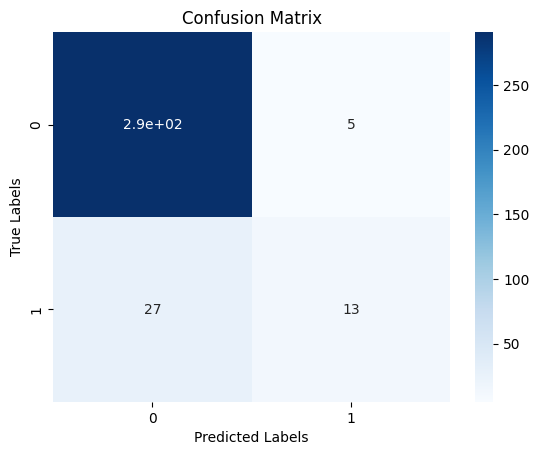

In [30]:
# Make predictions on the testing data
y_pred1 = best_model.predict(X_test1)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test1, y_pred1))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test1, y_pred1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

[0.10374128 0.05800296 0.0630874  0.05019659 0.09731334 0.05273917
 0.03284411 0.06961233 0.02885385 0.050238   0.02693322 0.0232039
 0.03117906 0.01146891 0.01003606 0.00637918 0.00380323 0.02475719
 0.01093098 0.01590209 0.00141659 0.         0.02498769 0.02291031
 0.00619812 0.0289862  0.10962936 0.01998781 0.01466107]


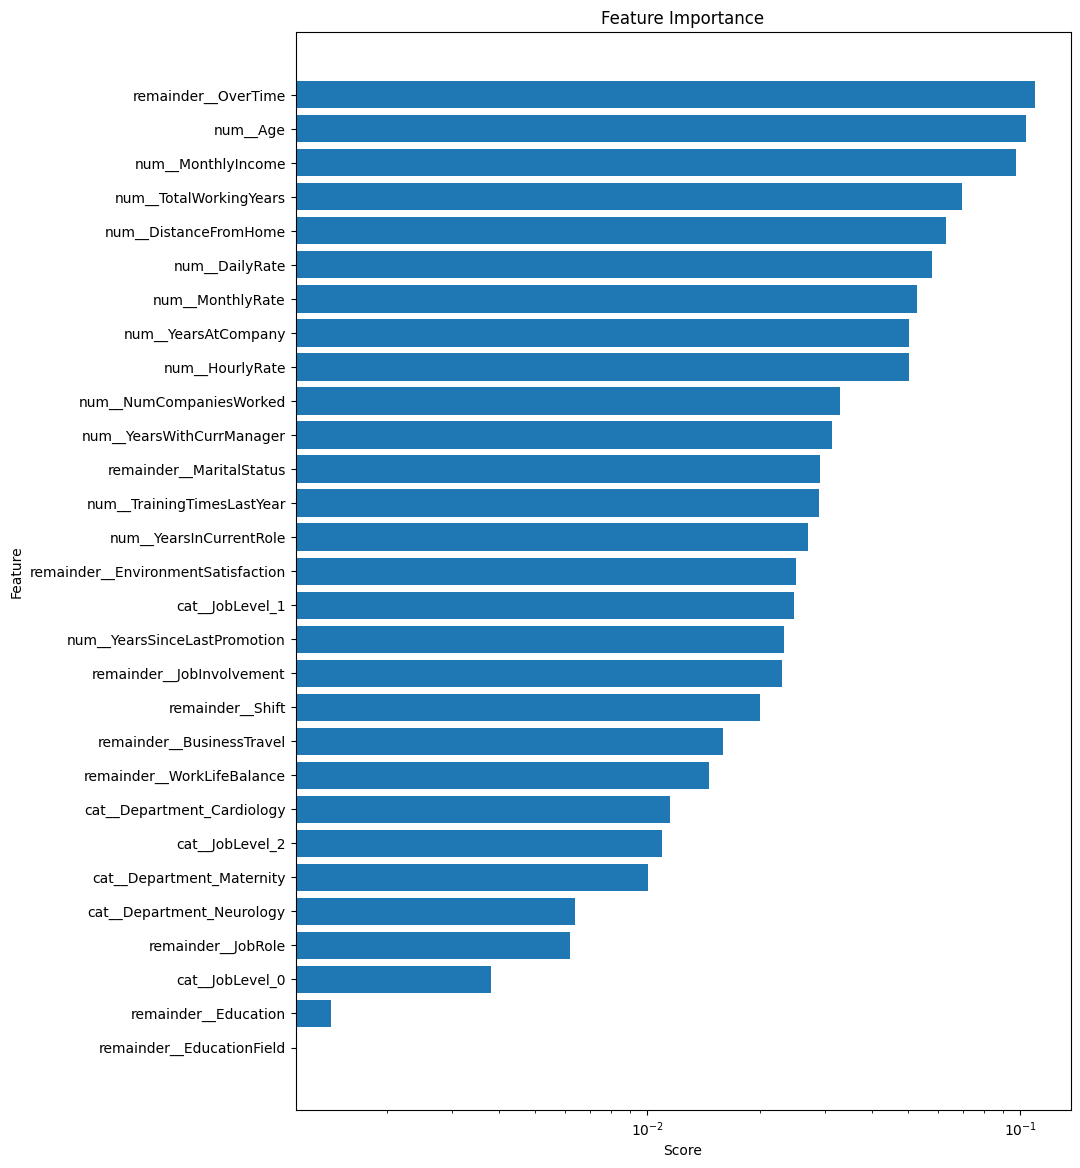

In [31]:
#feature importance score and plot them
feature_importance = best_model.feature_importances_
print(feature_importance)

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 14))

# Sort the feature importance scores and corresponding feature names
sorted_indices = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_indices]
sorted_scores = feature_importance[sorted_indices]

plt.barh(sorted_features, sorted_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Change the x-axis scale to logarithmic
plt.xscale('log')
plt.show()

In [3]:
#Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import Features1 as fe
from imblearn.over_sampling import SMOTE
from sklearn import set_config
from imblearn.pipeline import Pipeline as imbpipeline
# from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import make_pipeline 


In [4]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']
y= y.replace({'No': 0, 'Yes': 1})

In [22]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define feature engineering function
def dropcolumns(df):
    columns_to_drop = ['EmployeeID', 'EmployeeCount', 'Gender', 'JobSatisfaction', 'Over18', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours']
    df.drop(columns=columns_to_drop, inplace=True) 
    return df

# Create feature engineering transformer
clean_object = FunctionTransformer(dropcolumns)

# Define the steps for preprocessing numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine the transformers for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']),
        ('cat', categorical_transformer, ['Department', 'JobLevel']),
    ],
    remainder='passthrough'
)



# Define the pipeline with feature engineering, preprocessing, SMOTE, and classifier
pipeline = make_pipeline(FunctionTransformer(dropcolumns),FunctionTransformer(fe.features),
    preprocessor,
    SMOTE(random_state=11),
    RandomForestClassifier())
# pipeline = Pipeline (steps=[
#     ('df_eng', FunctionTransformer(fe.features)),
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE()),
#     ('classifier', RandomForestClassifier())
# ])




set_config(display='diagram')
pipeline



Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function dropcolumns at 0x000002C479EFF820>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function features at 0x000002C479EC4790>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',...
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Department',
                                                   'JobLevel'])])),
                ('smote', SMOTE(random_state=11)),
                ('randomforestclassifier', RandomForestClassifier())])

In [8]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
417,40,0,1398,Cardiology,2,0,0,0,79,0,...,0,0,1,21,2,0,20,15,1,12
243,40,0,1300,Maternity,24,0,0,1,62,0,...,1,0,0,9,3,0,9,8,4,7
1628,25,0,622,Cardiology,13,0,0,0,40,0,...,1,0,1,7,1,0,7,4,0,6
454,33,0,922,Maternity,1,1,0,1,95,0,...,4,0,0,10,2,0,6,1,0,5
1532,39,1,505,Maternity,2,0,0,0,64,0,...,0,0,1,20,1,0,19,6,11,8


In [9]:
y_train

417     0
243     0
1628    0
454     0
1532    0
       ..
735     0
1350    1
71      0
320     0
552     0
Name: Attrition, Length: 1340, dtype: int64

In [6]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')



Test set accuracy: 0.9017857142857143


In [11]:
# # Calculate the training accuracy
train_accuracy = pipeline.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# # # Calculate the testing accuracy
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

KeyError: "['EmployeeID', 'EmployeeCount', 'Gender', 'JobSatisfaction', 'Over18', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours'] not found in axis"

In [25]:
# from sklearn.model_selection import RandomizedSearchCV

# # Find the best hyperparameters using GridSearchCV on the train set
# param_grid = {'classifier__max_depth': [3, 5, 7, None], 
#               'classifier__n_estimators': [50, 100, 200, 500],
#               }

# random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,
#                                    n_iter=10, 
#                                    cv = 10)


# # grid = GridSearchCV(pipeline, param_grid=param_grid, cv=10)
# random_search.fit(X_train, y_train)

# best_model = random_search.best_estimator_
# best_hyperparams = random_search.best_params_
# best_acc = random_search.score(X_test, y_test)
# print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')




# # # Make predictions on the testing data
# # y_pred = best_model.predict(X_test)
# # #Classification Report
# # print("Classification Report (Default Threshold):")
# # print(classification_report(y_test, y_pred))
# # # Plot the confusion matrix
# # confusion_mat = confusion_matrix(y_test, y_pred)
# # sns.heatmap(confusion_mat, annot=True, cmap='Blues')
# # plt.title('Confusion Matrix')
# # plt.xlabel('Predicted Labels')
# # plt.ylabel('True Labels')
# # plt.show()

ValueError: Invalid parameter 'classifier' for estimator Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function features at 0x000001BFBF274790>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Department',
                                                   'JobLevel'])])),
                ('smote', SMOTE(random_state=11)),
                ('randomforestclassifier', RandomForestClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [7]:
# # Calculate the training accuracy
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# # Calculate the testing accuracy
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

NameError: name 'best_model' is not defined

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the steps for preprocessing numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine the transformers for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']),
        ('cat', categorical_transformer, ['Department', 'JobLevel']),
    ],
    remainder='passthrough'
)

# imba_pipeline = make_pipeline(SMOTE(random_state=42), 
#                               LogisticRegression(C=3.4))

# Define the pipeline with feature engineering, preprocessing, SMOTE, and classifier
# pipeline = make_pipeline(FunctionTransformer(fe.features),
#     preprocessor,
#     SMOTE(random_state=11),
#     RandomForestClassifier())
pipeline = Pipeline (steps=[
    ('df_eng', FunctionTransformer(fe.features)),
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),
    ('classifier', RandomForestClassifier())
])




set_config(display='diagram')
pipeline

Pipeline(steps=[('df_eng',
                 FunctionTransformer(func=<function features at 0x000001BFBF274790>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Department',
                                                   'JobLevel'])])),
                ('smote', SMOTE()), ('classifier', RandomForestClassifier())])